<a href="https://colab.research.google.com/github/ivyclare/GANs/blob/master/GAN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing libraries we need
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Mini-batch size
mb_size = 64

# This will transform data to tensor format which is pytorch's expexted format
transform = transforms.ToTensor()

# Here we download the dataset and trnsfrom it, train=True will only download traning dataset
traindata = torchvision.datasets.MNIST('./NewData/', download=True, transform=transform, train = True)

# Loading the training data
trainloader = torch.utils.data.DataLoader(traindata, shuffle=True, batch_size=mb_size)

0it [00:00, ?it/s]

9920512it [00:01, 8806694.92it/s]                            


Extracting ./NewData/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135523.87it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./NewData/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2193088.63it/s]                           
0it [00:00, ?it/s]

Extracting ./NewData/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 50470.69it/s]            


Extracting ./NewData/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


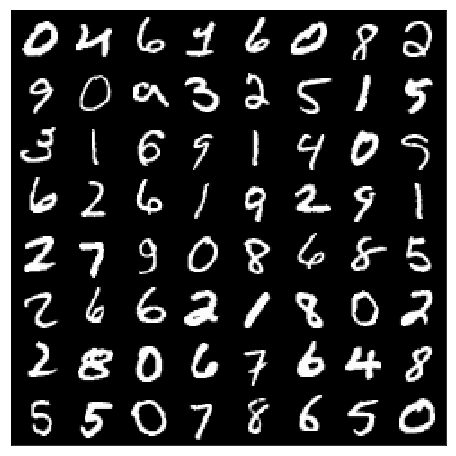

torch.Size([64, 1, 28, 28])


In [0]:
# Just as an example we are going to visualize 

# We define an iterator 

dataiter = iter(trainloader)
imgs, labels = dataiter.next()

def imshow(imgs):
    """ Visualizing images """
    # make_grid will make a grid out of images
    imgs = torchvision.utils.make_grid(imgs)
    
    # transfoming tensors to numpy arrays
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

imshow(imgs)

print(imgs.size())

In [0]:
# House keeping 2
# Defining the parematers of the network
h_dim = 128    # number of hidden neurons in our hidden layer
Z_dim = 100    # dimension of the input noise for generator
lr = 1e-3      # learning rate
X_dim = imgs.view(imgs.size(0), -1).size(1)

print(X_dim)

784


In [0]:
#Initializing Weights
# Initializing the network with the right weights is very important if you want your neural network to function properly. 
# We need to make sure that the weights are in a reasonable range before we start training the network. 

# Xavier Initialiation is the weights initialization technique that tries to make 
#the variance of the outputs of a layer to be equal to the variance of its inputs.

def xavier_init(m):
    """ Xavier initialization """
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

In [0]:
# Defining the Genrator 

class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, X_dim),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
    
    def forward(self, input):
        return self.model(input)
    
test = Gen()
print(test)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [0]:
# Defining the Discriminator

class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, 1),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
    
    def forward(self, input):
        return self.model(input)
    
test = Dis()
print(test)

Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [0]:
# Instantiating the networks
G = Gen()
D = Dis()

In [0]:
# Defining solver(optimizer) to do the mini batch stochastic gradient descent 
# one for each network 
G_solver = opt.Adam(G.parameters(), lr = lr)
D_solver = opt.Adam(D.parameters(), lr = lr)

# One important note
Both discriminator and genrator are competing for $D(G(z))$ term Discrimator wants to maximize it, while Generator wants to minimize it. $D(G(z))$ stands for, probablity of labling fake data correctly by discriminator. 

Epoch:0,   G_loss:1.9955426746848295,   D_loss:0.7617834888732256


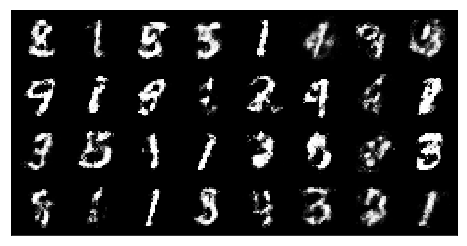

Epoch:1,   G_loss:2.0171563835032207,   D_loss:0.75787714139612


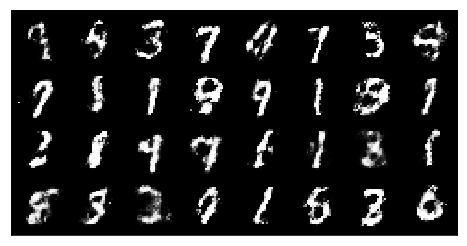

Epoch:2,   G_loss:1.996209878148809,   D_loss:0.7486731940622269


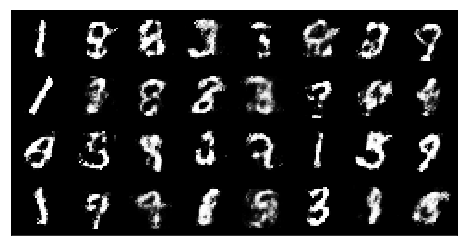

Epoch:3,   G_loss:2.021230931729396,   D_loss:0.7479647065340075


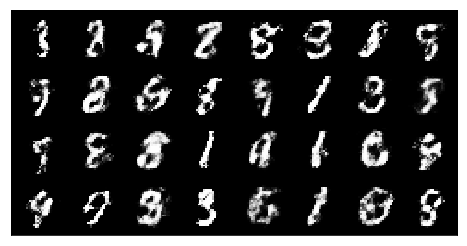

Epoch:4,   G_loss:1.9969824053077048,   D_loss:0.7493341090455492


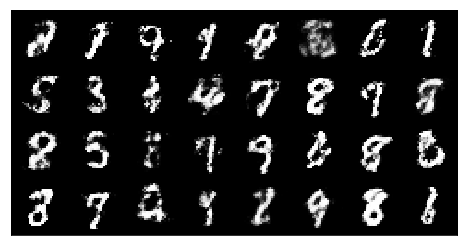

Epoch:5,   G_loss:2.042503661565435,   D_loss:0.739374016774997


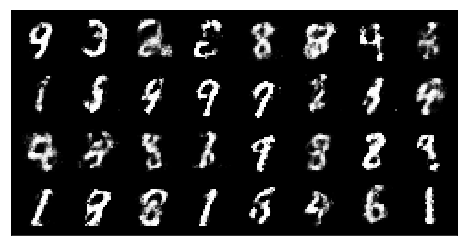

Epoch:6,   G_loss:1.9980920727319047,   D_loss:0.7404305188259336


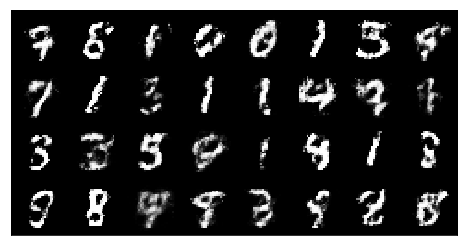

Epoch:7,   G_loss:2.0331490159288905,   D_loss:0.7371043331587492


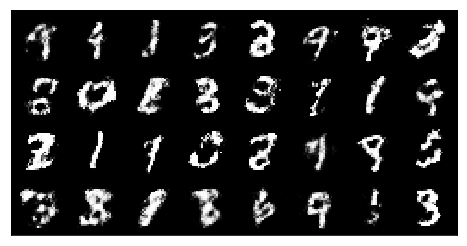

Epoch:8,   G_loss:2.029628216966129,   D_loss:0.7319836866881039


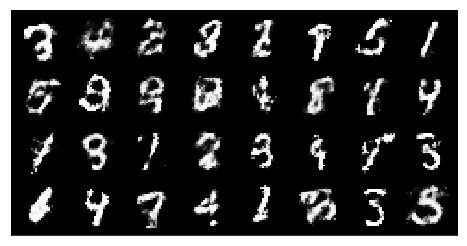

Epoch:9,   G_loss:2.0803663168888864,   D_loss:0.7189214386856124


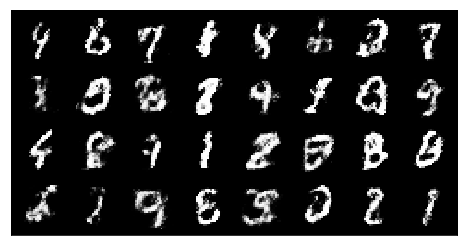

Epoch:10,   G_loss:2.1165942706024725,   D_loss:0.7087113894760482


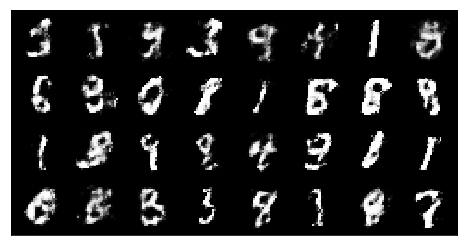

Epoch:11,   G_loss:2.134057952396905,   D_loss:0.7066307163823133


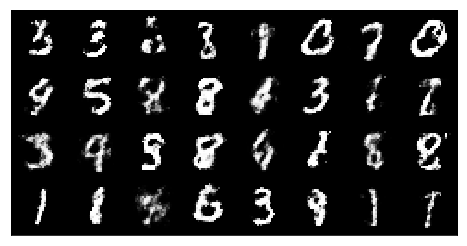

Epoch:12,   G_loss:2.1451753993024196,   D_loss:0.7079144530713177


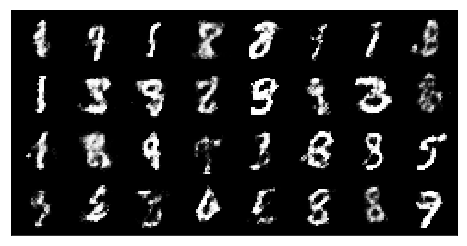

Epoch:13,   G_loss:2.1662693950158953,   D_loss:0.7084271380387898


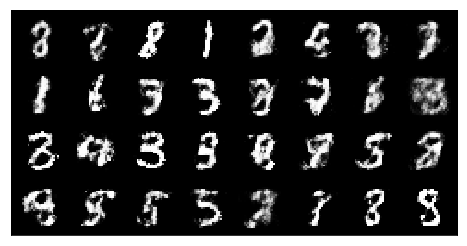

Epoch:14,   G_loss:2.1608759106349336,   D_loss:0.7082592396021906


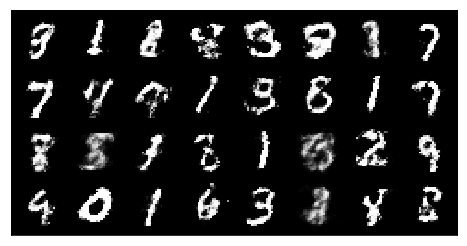

Epoch:15,   G_loss:2.181180872896841,   D_loss:0.7052049357245471


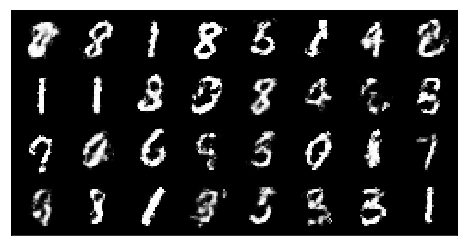

Epoch:16,   G_loss:2.1678084554448565,   D_loss:0.7031438575306935


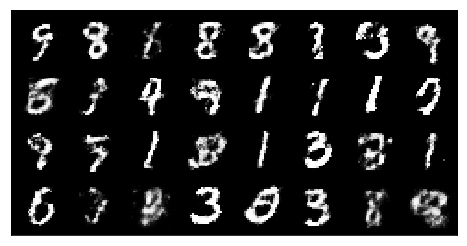

Epoch:17,   G_loss:2.1927941122543073,   D_loss:0.6975338751319121


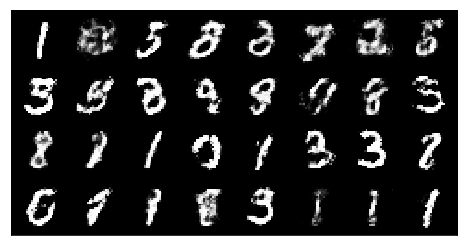

Epoch:18,   G_loss:2.2166230623910166,   D_loss:0.698176378697983


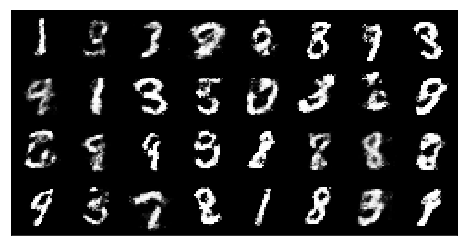

Epoch:19,   G_loss:2.207752137550159,   D_loss:0.6917973595705114


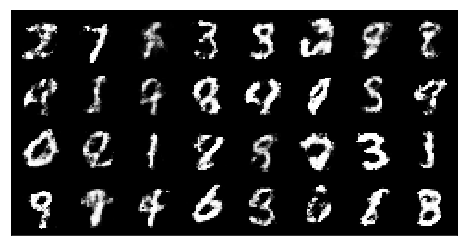

Epoch:20,   G_loss:2.22689980204934,   D_loss:0.6915107538133288


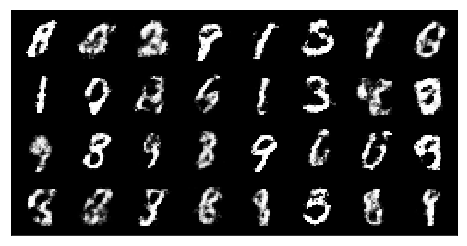

Epoch:21,   G_loss:2.2359298696395937,   D_loss:0.6882585566689465


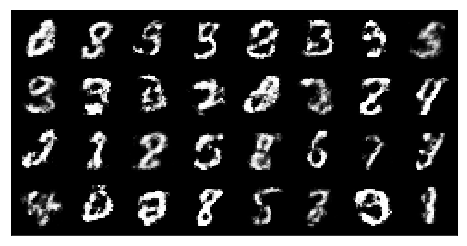

Epoch:22,   G_loss:2.2289389516753175,   D_loss:0.6891640625210967


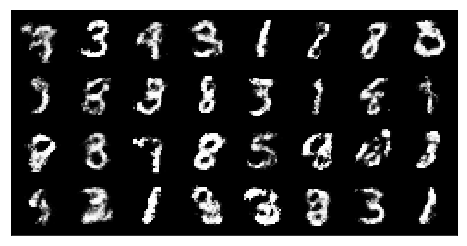

Epoch:23,   G_loss:2.2467440125276283,   D_loss:0.6858841621164066


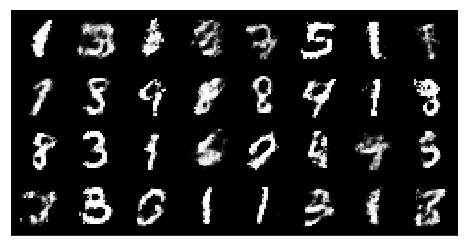

Epoch:24,   G_loss:2.2539538963517147,   D_loss:0.6765440537540643


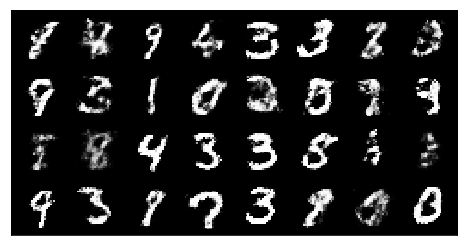

Epoch:25,   G_loss:2.2664209188682944,   D_loss:0.6755400798849459


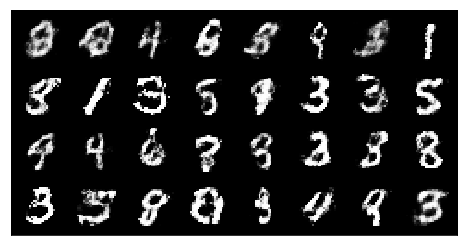

Epoch:26,   G_loss:2.2506025048461296,   D_loss:0.6752255695270323


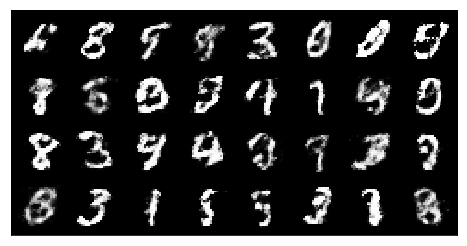

Epoch:27,   G_loss:2.2530271818897107,   D_loss:0.6667808334329235


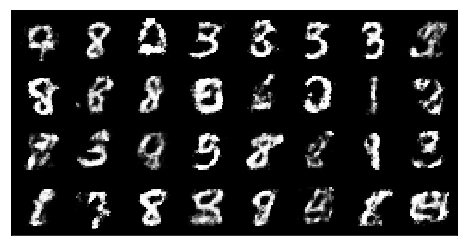

Epoch:28,   G_loss:2.2795025539804876,   D_loss:0.6663124801507637


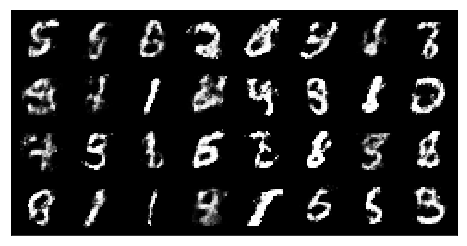

Epoch:29,   G_loss:2.2844409669386043,   D_loss:0.663735773994216


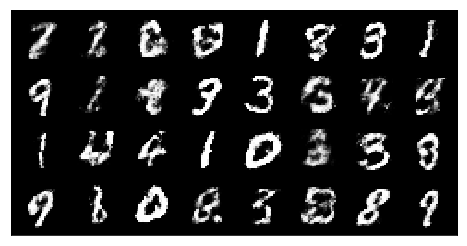

In [0]:
# Defining the training for loop
for epoch in range(30):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i,data in enumerate(trainloader):
        X, _ = data
        X = X.view(X.size(0), -1)
        mb_size = X.size(0)
        
        # Definig labels for real (1s) and fake (0s) images
        one_labels = torch.ones(mb_size, 1)
        zero_labels = torch.zeros(mb_size, 1)
        
        # Random normal distribution for each image
        z = torch.randn(mb_size, Z_dim)
        
        
        # Feed forward in discriminator both 
        # fake and real images
        D_real = D(X) # Pass real images through the discriminator model
        # fakes = G(z)
        D_fake = D(G(z)) # Generate fake images through the generator and pass them into the discriminator model
        
        # Defining the loss for Discriminator
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_fake_loss + D_real_loss
        
        # backward propagation for discriminator
        D_solver.zero_grad()
        D_loss.backward()
        D_solver.step()
        
        # Feed forward for generator
        z = torch.randn(mb_size, Z_dim)
        D_fake = D(G(z))
        
        # loss function of generator
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        # backward propagation for generator
        G_solver.zero_grad()
        G_loss.backward()
        G_solver.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    # printing loss after each epoch 
    print('Epoch:{},   G_loss:{},   D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1) ))
    
    # Plotting fake images generated after each epoch by generator
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28)
    imshow(samples)
        
        